In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv('digikala-orders.csv')
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [4]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['YearMonth'] = data['DateTime_CartFinalize'].map(lambda date: date.year*100 + date.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [5]:
order_month = data.groupby(['YearMonth'])['ID_Order'].count().reset_index()
order_month

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


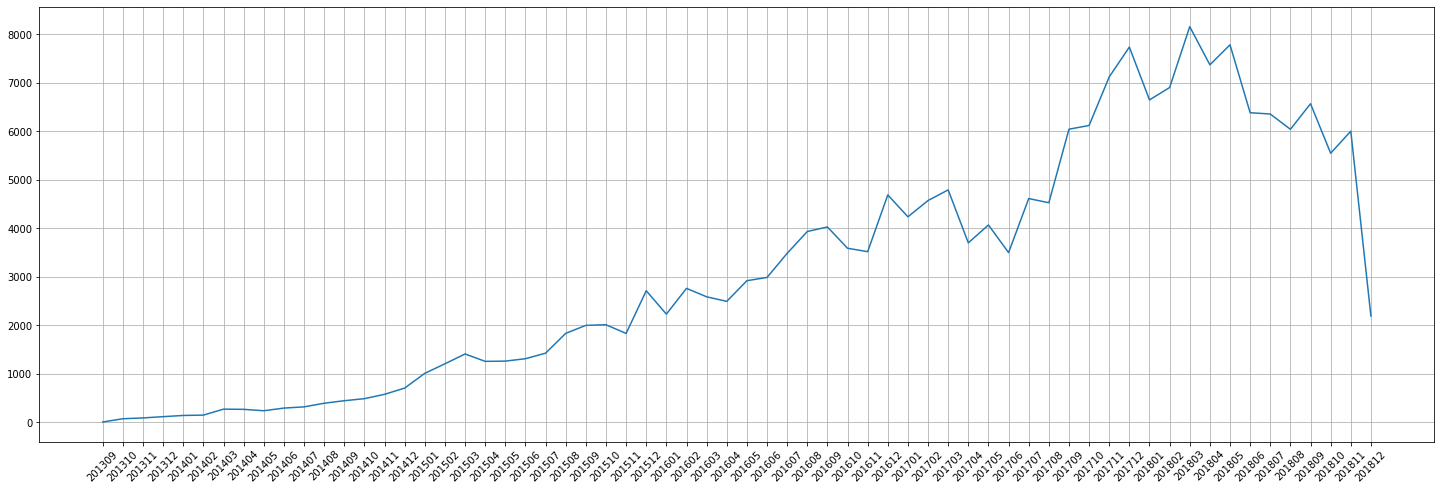

In [17]:
plt.figure(figsize=(25, 8))

plt.grid()
plt.xticks(rotation=45)
plt.plot(order_month['YearMonth'].to_numpy(dtype=str), order_month['ID_Order'])
plt.savefig('digiOrder.png')

In [24]:
customer_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
customer_city

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [25]:
sort_customer_city = customer_city.sort_values('ID_Customer', ascending=False)
sort_customer_city

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
...,...,...
552,فرخی,1
71,اسیر,1
782,پیشین,1
783,چابهار,1


In [33]:
more_customer = sort_customer_city[:8]
more_customer

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075


In [34]:
other_customer = pd.DataFrame({'city_name_fa':'others', 
                              'ID_Customer': sort_customer_city['ID_Customer'][8:].sum()}, index=[9])
other_customer

,city_name_fa,ID_Customer
9,others,47647


In [39]:
customers_cities = pd.concat([more_customer, other_customer])
customers_cities

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
9,others,47647


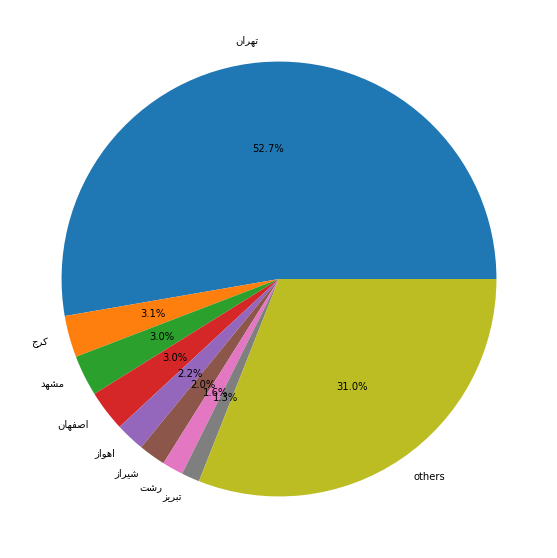

In [44]:
labels = customers_cities['city_name_fa'].values
persian_labels = [get_display(reshape(label)) for label in labels]

plt.figure(figsize=(10, 10))
plt.pie(customers_cities['ID_Customer'], labels=persian_labels, autopct='%1.1f%%')
# plt.savefig('pie.png', dpi=200)
plt.show()